<a href="https://colab.research.google.com/github/khan-habibullah/clustring/blob/main/conn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install zat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import zat
from zat.log_to_dataframe import LogToDataFrame
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
log_to_df = LogToDataFrame()
conn_log = log_to_df.create_dataframe("/content/conn (1).log")

In [6]:
features = conn_log[['duration', 'orig_bytes', 'resp_bytes']]
features.isnull().sum()

duration      22549
orig_bytes    22549
resp_bytes    22549
dtype: int64

In [7]:
features.shape

(27473, 3)

In [8]:
new=features.dropna()

In [9]:
new.shape

(4924, 3)

In [10]:
new.head()

,duration,orig_bytes,resp_bytes
ts,,,
2023-05-12 16:59:50.407644928,0 days 00:00:00.410316,180,0
2023-05-12 16:59:50.407763968,0 days 00:00:00.410274,180,0
2023-05-12 16:59:42.042371072,0 days 00:00:09.252809999,720,0
2023-05-12 16:59:42.043493120,0 days 00:00:09.252302,720,0
2023-05-12 17:00:00.172740096,0 days 00:00:00.417743,52,0


In [11]:
import datetime

for i in range(len(new['duration'])):
    duration = str(new['duration'][i])
    hours, minutes, seconds = duration.split(":")
    seconds, microseconds = seconds.split(".")

    new['duration'][i] = int(microseconds)

<ipython-input-11-a41d6982c9cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['duration'][i] = int(microseconds)


In [12]:
from sklearn.preprocessing import normalize
data_scaled = normalize(new)
data_scaled = pd.DataFrame(data_scaled, columns=new.columns)
data_scaled.head()

,duration,orig_bytes,resp_bytes
0,1.000000,0.000439,0.0
1,1.000000,0.000439,0.0
2,1.000000,0.000003,0.0
3,0.999996,0.002854,0.0
4,1.000000,0.000124,0.0


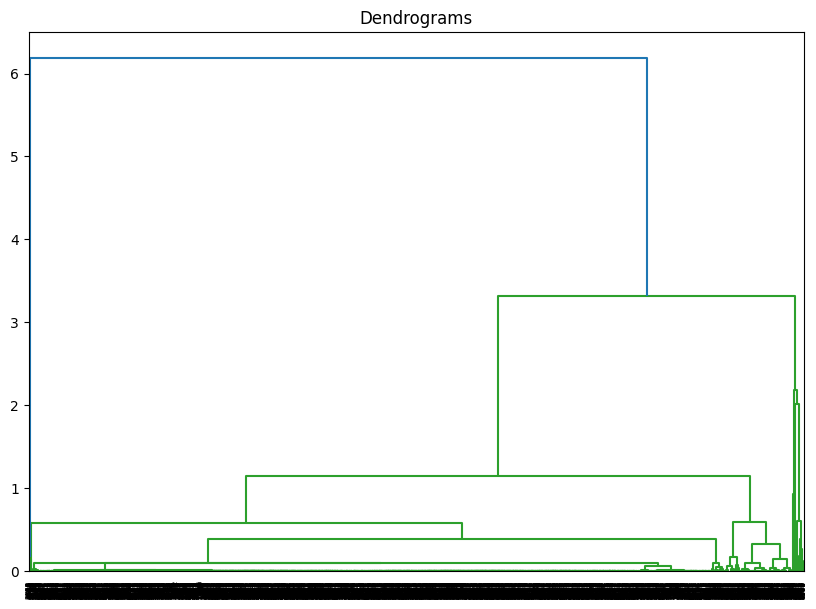

In [13]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

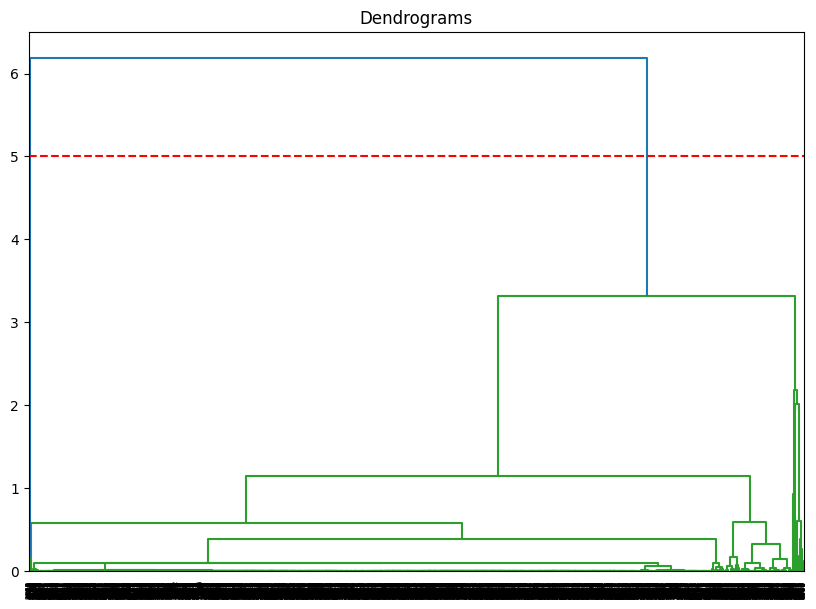

In [14]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=5, color='r', linestyle='--')

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

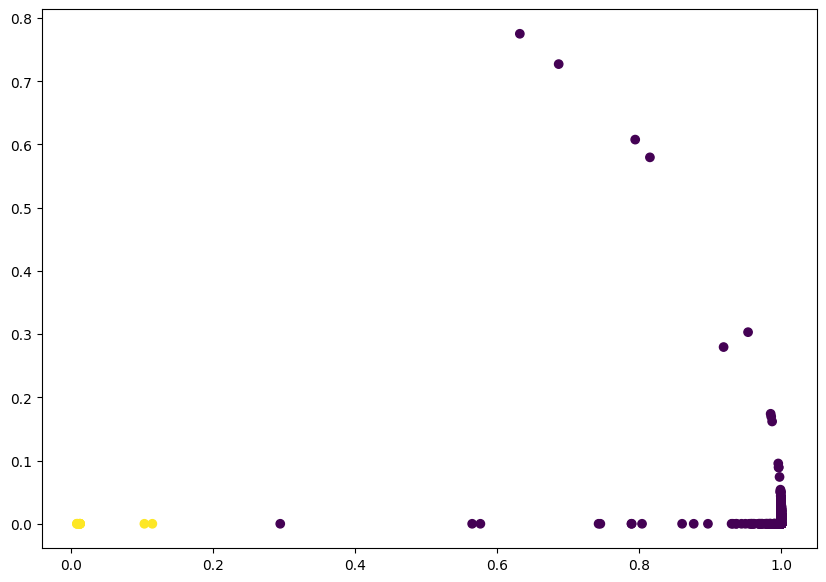

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['duration'], data_scaled['resp_bytes'], c=cluster.labels_)

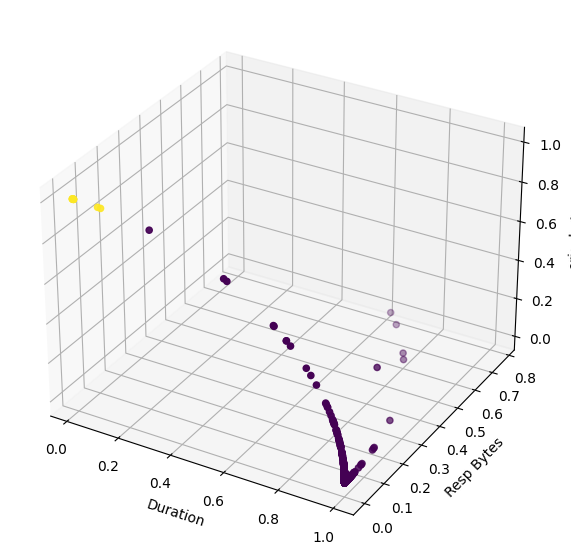

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_scaled['duration'], data_scaled['resp_bytes'], data_scaled['orig_bytes'], c=cluster.labels_)

ax.set_xlabel('Duration')
ax.set_ylabel('Resp Bytes')
ax.set_zlabel('orig_bytes')

plt.show()